In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998
ID#,1,2,3,4,5,6,7,8,9,10,...,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021
Balance,28143,19244,41354,14776,97752,16420,84914,20856,443003,104860,...,2622,11310,39142,11181,3974,18476,64385,73597,54899,3016
Qual_miles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc1_miles,1,1,1,1,4,1,3,1,3,3,...,1,1,3,1,1,1,1,3,1,1
cc2_miles,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
cc3_miles,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bonus_miles,174,215,4123,500,43300,0,27482,5250,1753,28426,...,1625,5021,14981,929,365,8525,981,25447,500,0
Bonus_trans,1,2,4,1,26,0,25,4,43,28,...,6,2,28,12,3,4,5,8,1,0
Flight_miles_12mo,0,0,0,0,2077,0,0,250,3850,1150,...,0,0,0,0,0,200,0,0,500,0
Flight_trans_12,0,0,0,0,4,0,0,1,12,3,...,0,0,0,0,0,1,0,0,1,0


In [6]:
df.shape

(3999, 12)

In [7]:
# Standarization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

In [8]:
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [11]:
df['Cluster'] = kmeans.predict(scaled_df)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [12]:
#Within a cluster sum of square
kmeans.inertia_

27446.37245668138

In [13]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    dist = kmeans.inertia_
    wcss.append(dist)

In [14]:
wcss

[35409.51145242436,
 30899.246824652197,
 27446.37245668138,
 24541.329582045775,
 21089.973628929645,
 19165.861458655665,
 17316.866446128297,
 16043.406242309518,
 14726.983322766799]

In [15]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

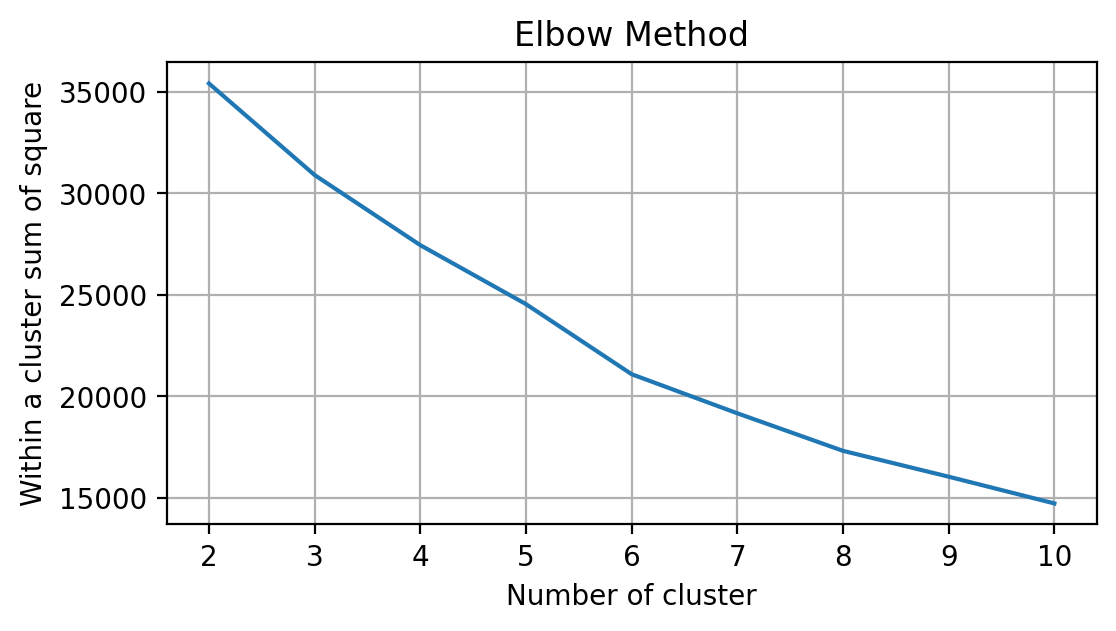

In [16]:
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within a cluster sum of square')
plt.grid()

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    if i > 2:
        break

In [18]:
# Build Cluster Algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [19]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
# Assign Clusters to the data set
df['clusterid_new'] = clusters_new.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [21]:
clusters_new.cluster_centers_

array([[-0.29009238, -0.06126673, -0.59736276,  0.03055393, -0.0607788 ,
        -0.50964761, -0.47765835, -0.18541838, -0.19723685, -0.19914141,
        -0.34343023],
       [ 0.43692851,  0.01780092,  1.21489235, -0.08208861,  0.13268734,
         0.96715784,  0.76951536, -0.08127792, -0.09179644,  0.37022327,
         0.58455729],
       [ 1.20678053,  0.82616339,  0.06749543,  0.14957307, -0.06276658,
         0.58949594,  1.60289784,  3.5370169 ,  3.8034103 ,  0.28930824,
         0.91247937]])

In [22]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [23]:
# What is avarage of top10 for cluster 1 = 86.6
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501,1.026387
1,1,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623,0.007154
2,2,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976,1.981707


In [24]:
df[df['clusterid_new']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0,1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0,1
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0,1


In [25]:
df[df['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [26]:
df['clusterid_new'].value_counts()

0    2577
1    1258
2     164
Name: clusterid_new, dtype: int64